# Business Case: Aerofit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# 1. Defining Problem Statement and Analysing basic metrics
* **Observations On:**
    - Shape of data
    - Data Types of all attributes
    - Conversion of Categorical attributes to category (if required)
    - Statistical Summary

In [3]:
df.shape

(180, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


`Observations:`
   - There are no missing values in the data.
   - There are 3 unique products in the dataset.
   - KP281 is the most frequent product.
   - Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.
   - Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.
   - Out of 180 data points, 104's gender is Male and rest are the female.
   - Standard deviation for Income & Miles is very high. These variables might have the outliers in it.

In [6]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


# 2. Non-Graphical Analysis: Value Counts and Unique Attributes

In [7]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [8]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [9]:
df['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [10]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [11]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [12]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [13]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [14]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [15]:
df['Income'].value_counts()

45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64

In [16]:
df['Miles'].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

# 3. Visual Analysis - Univariate and Bivariate
* For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)
* For categorical variable(s): Boxplot (10 Points)
* For correlation: Heatmaps, Pairplots(10 Points)

## 3.1 Univariate Analysis

### `Continuous Variables`

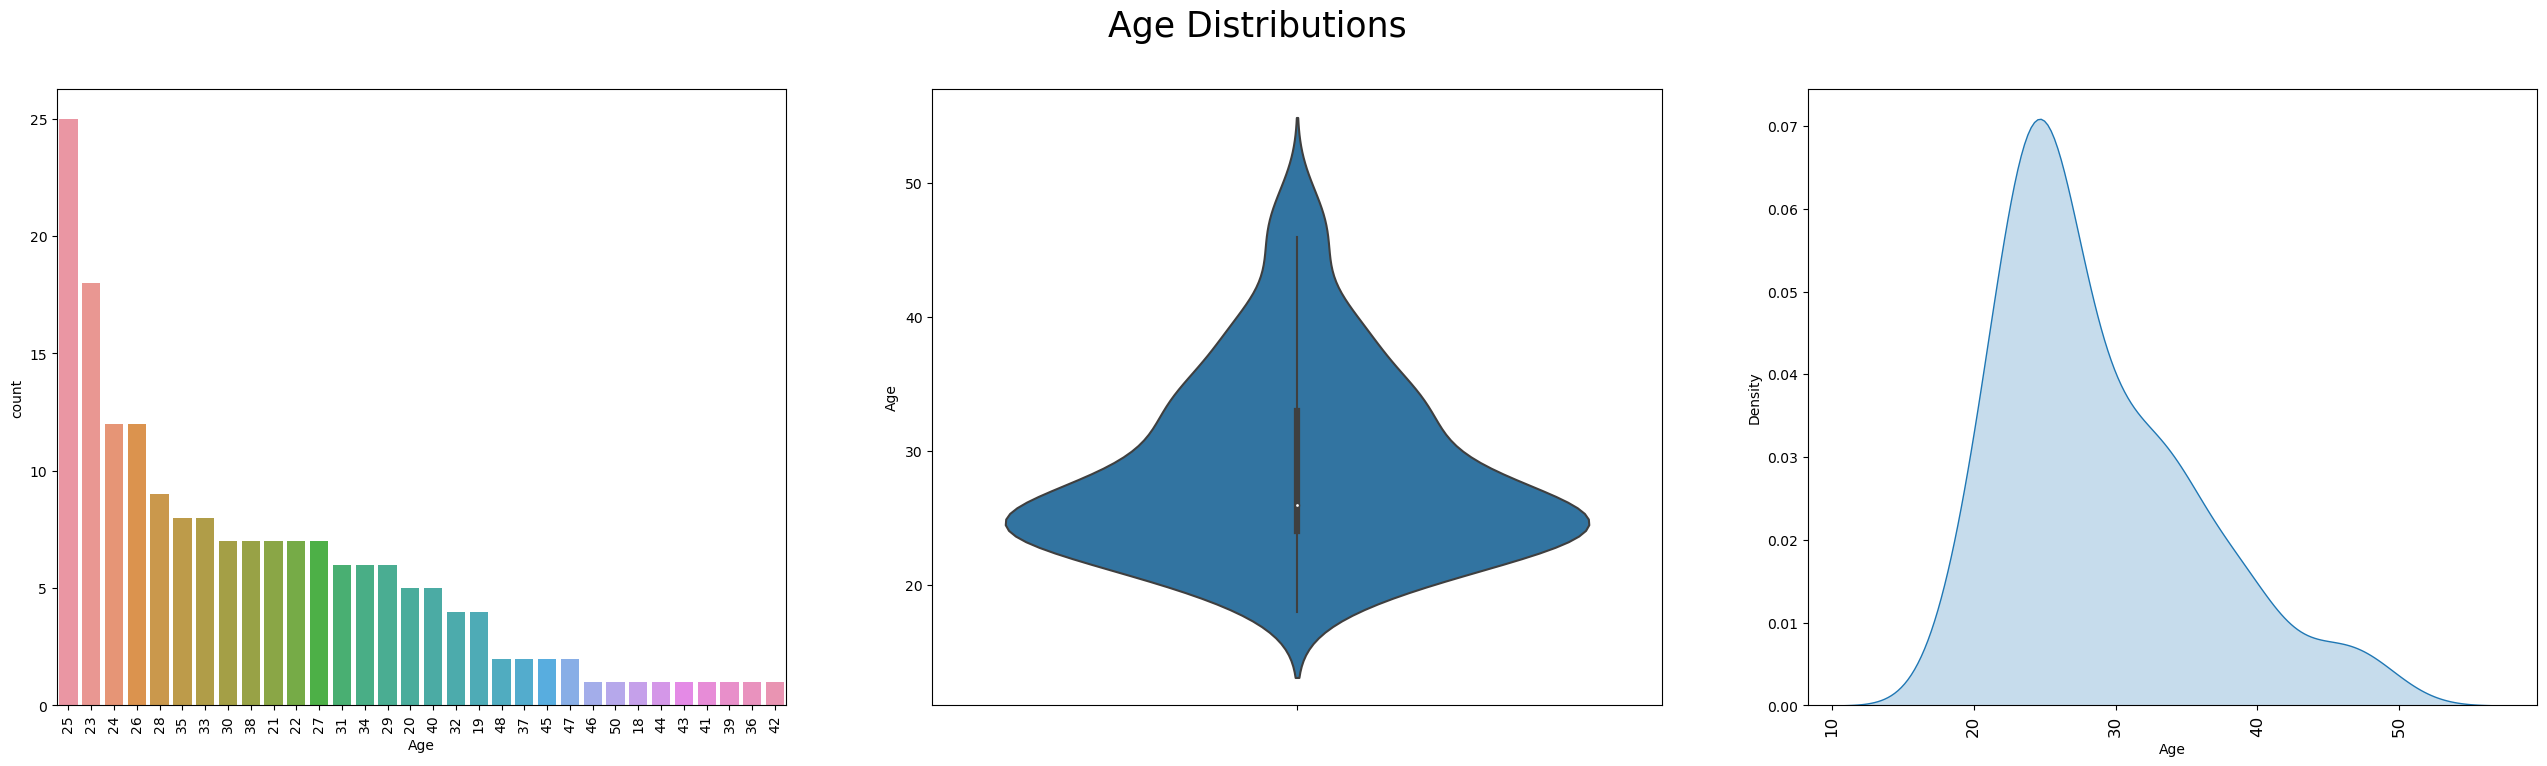

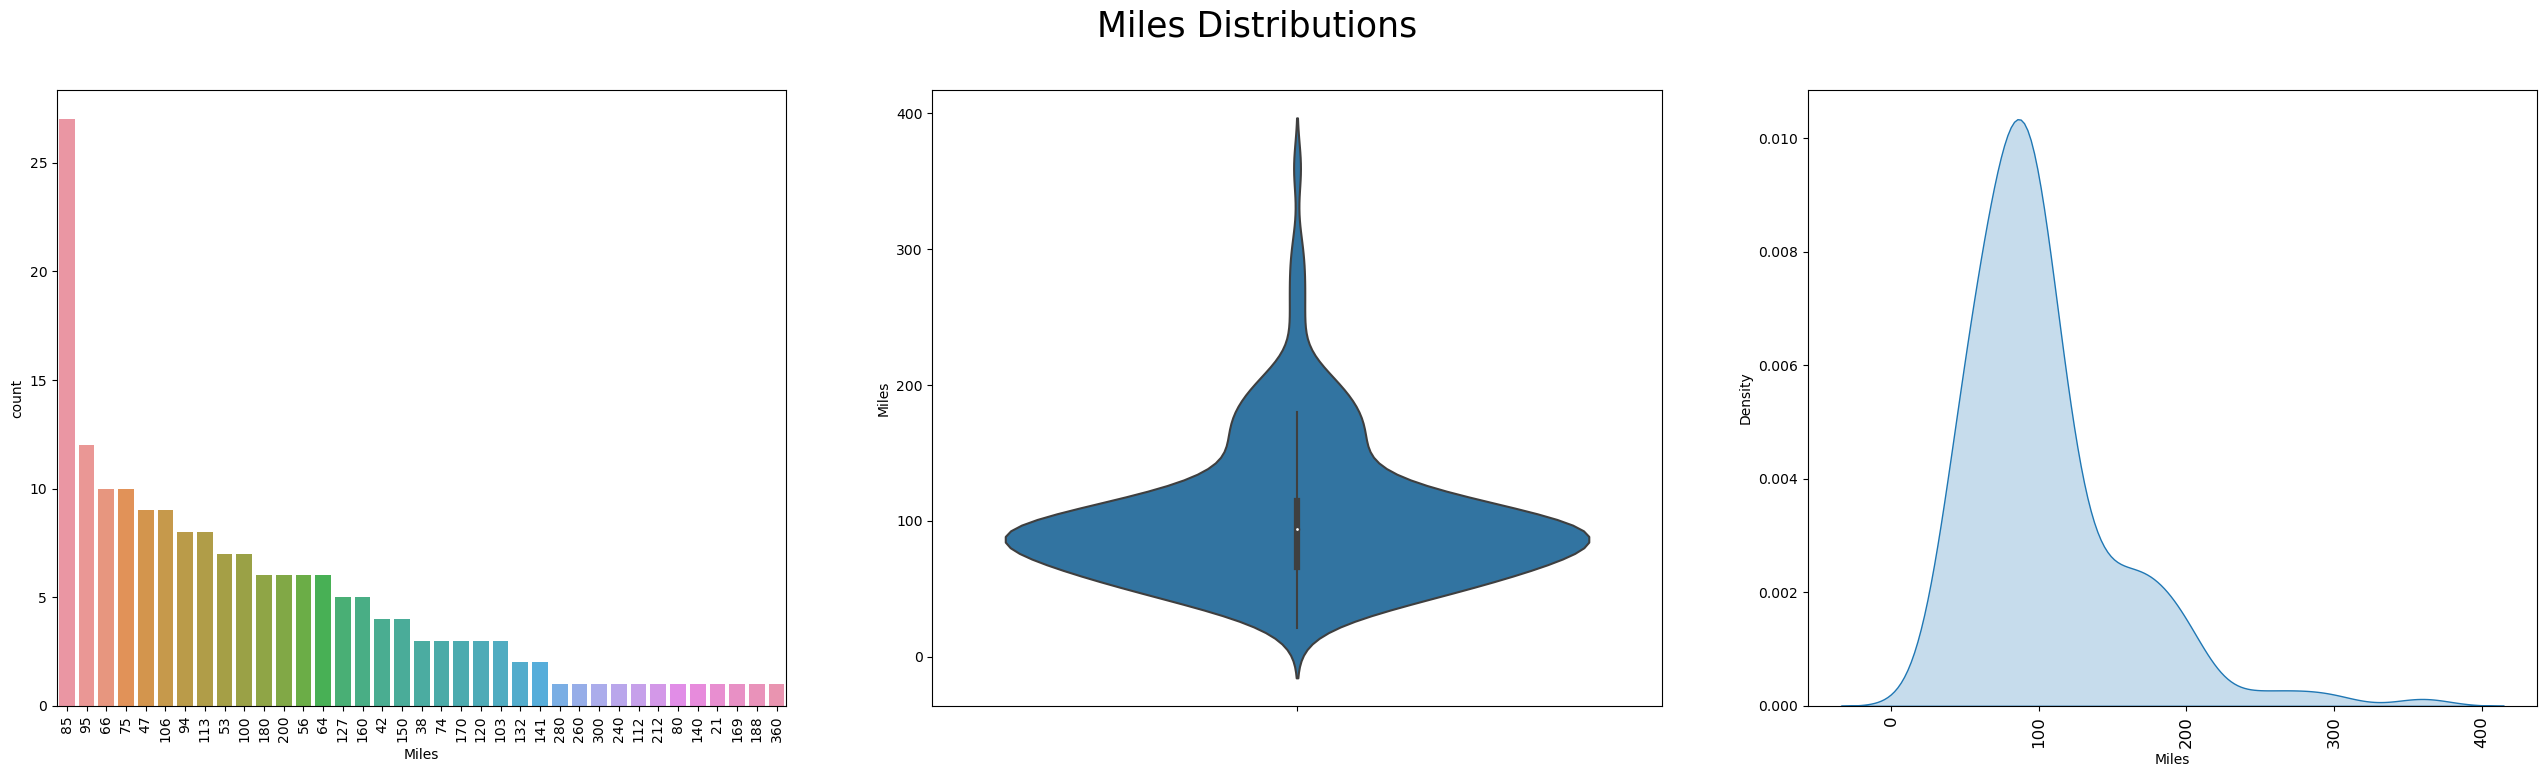

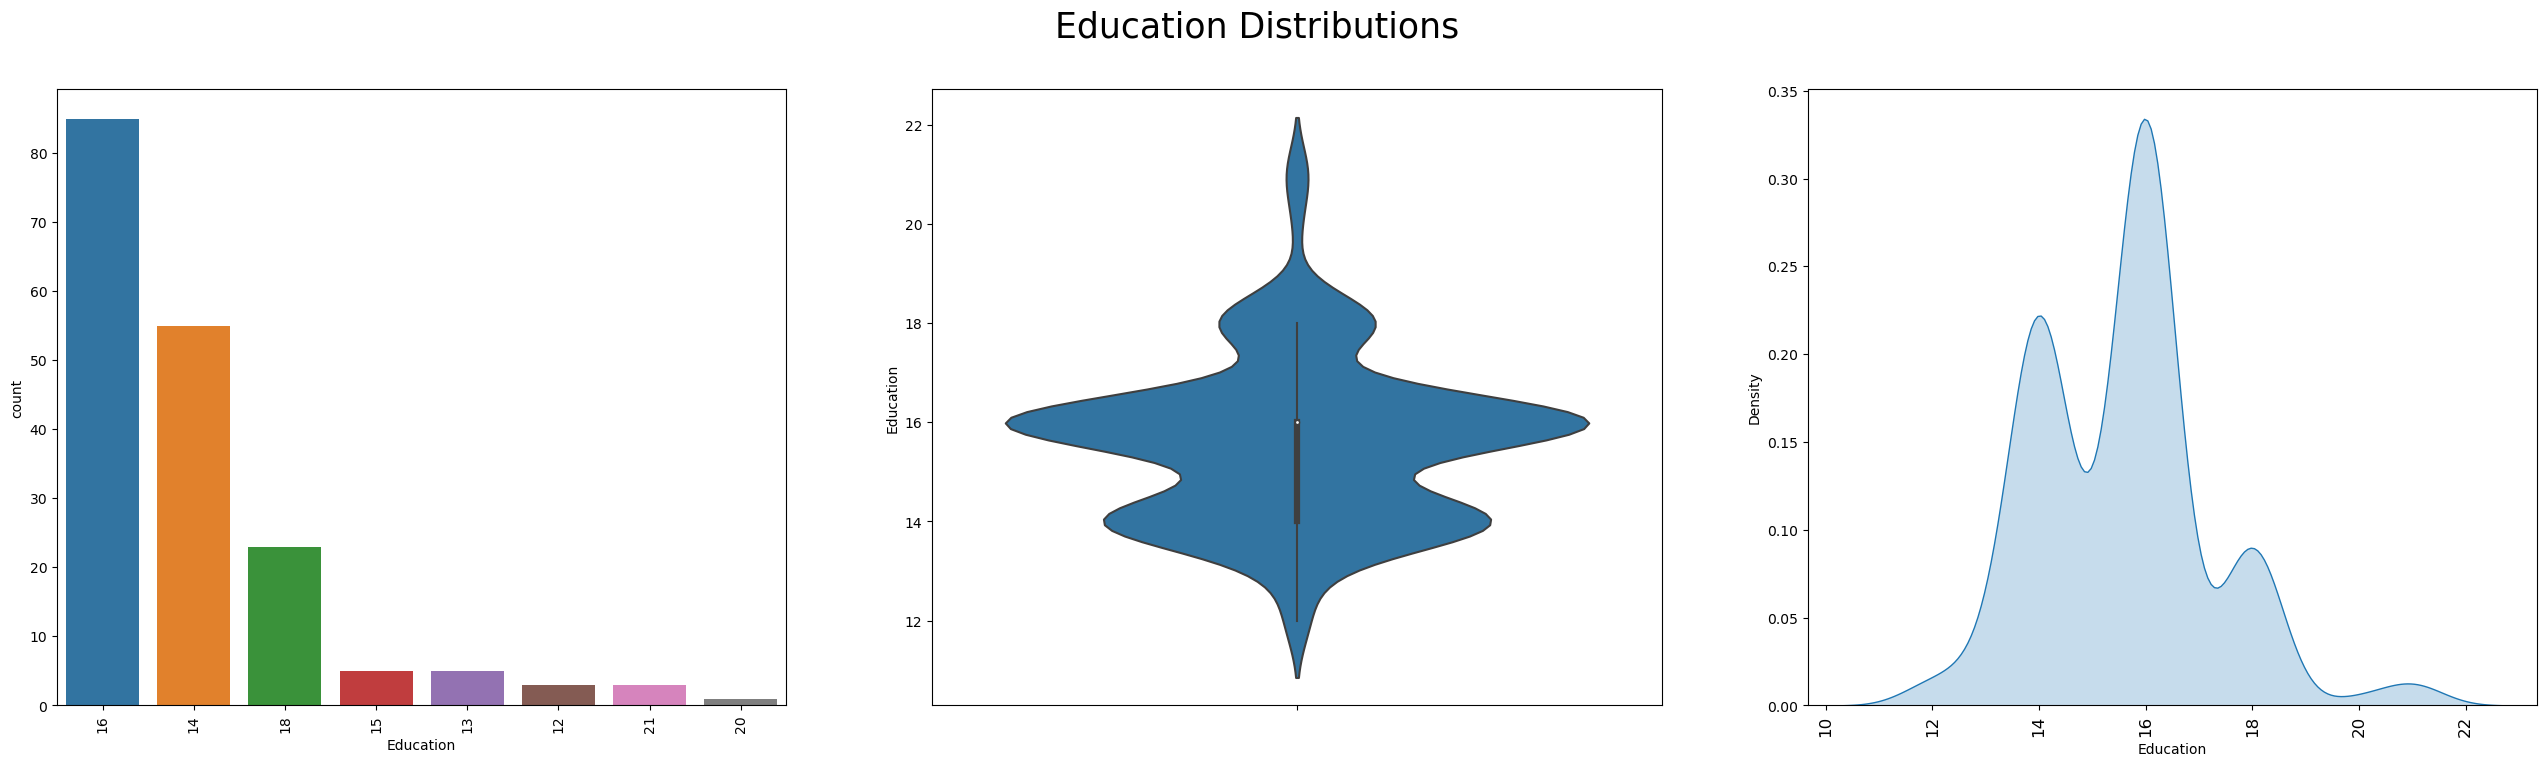

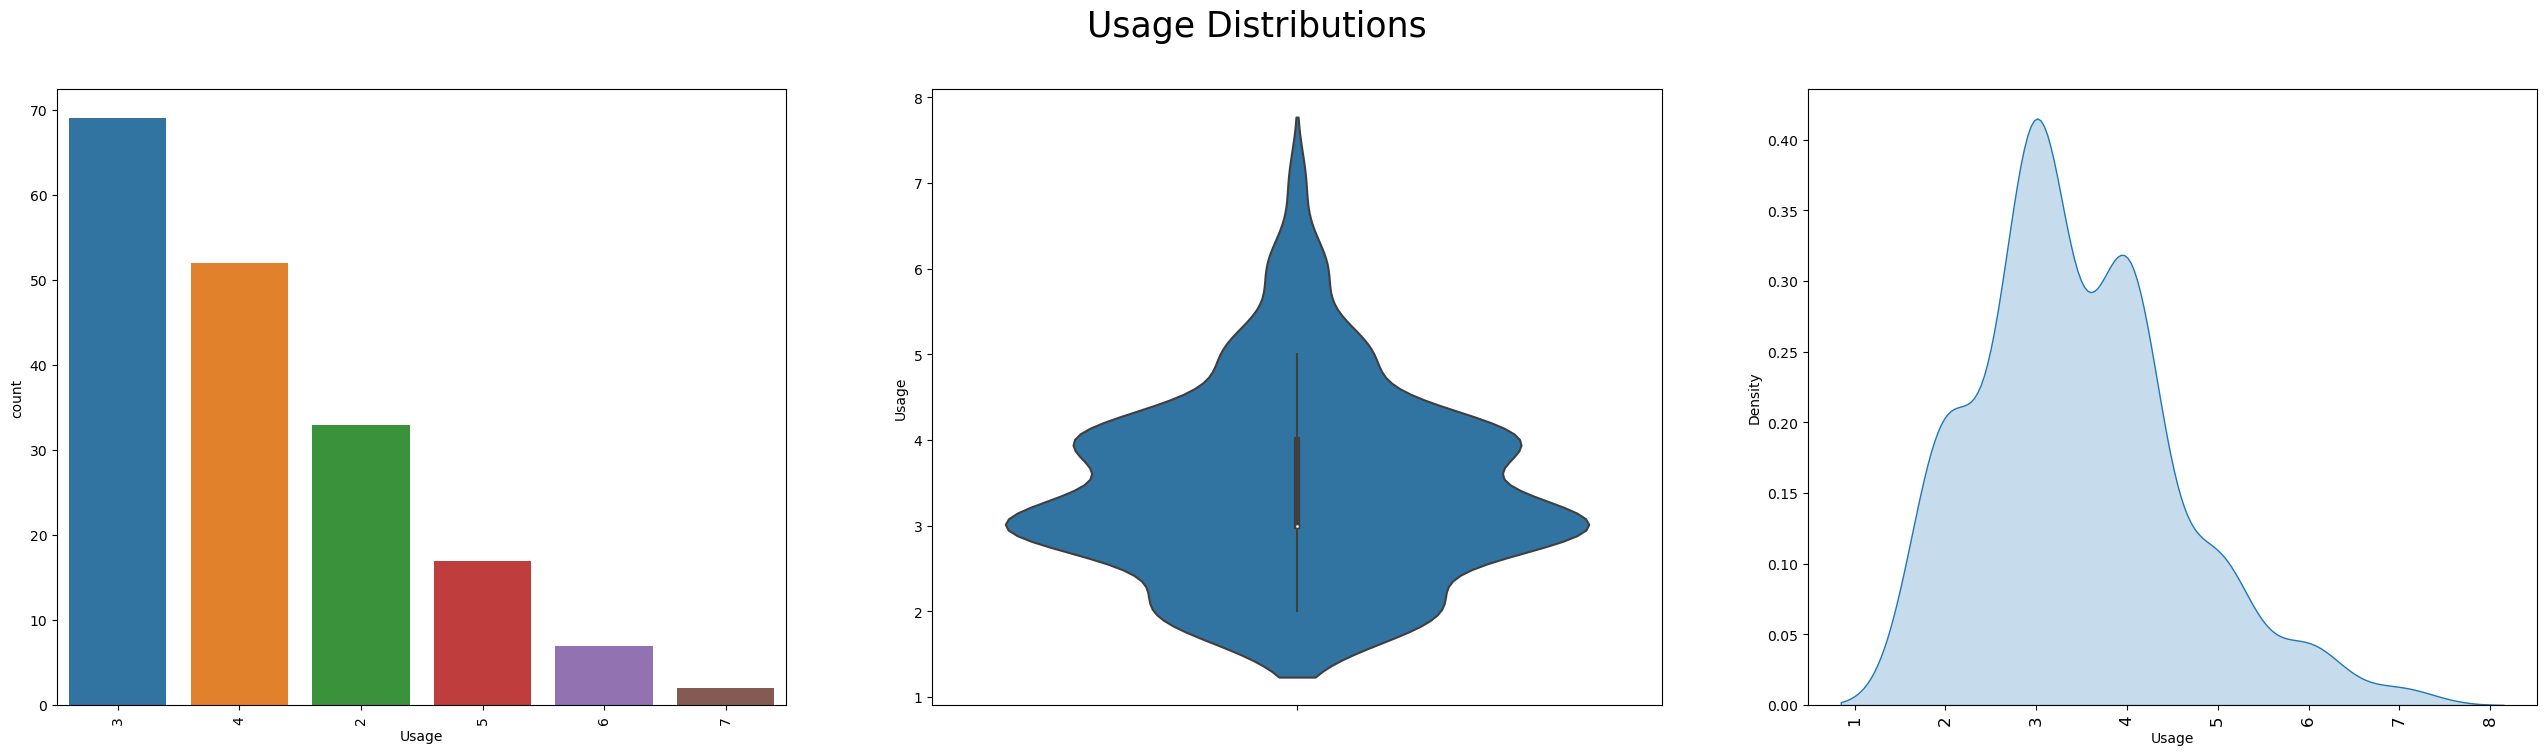

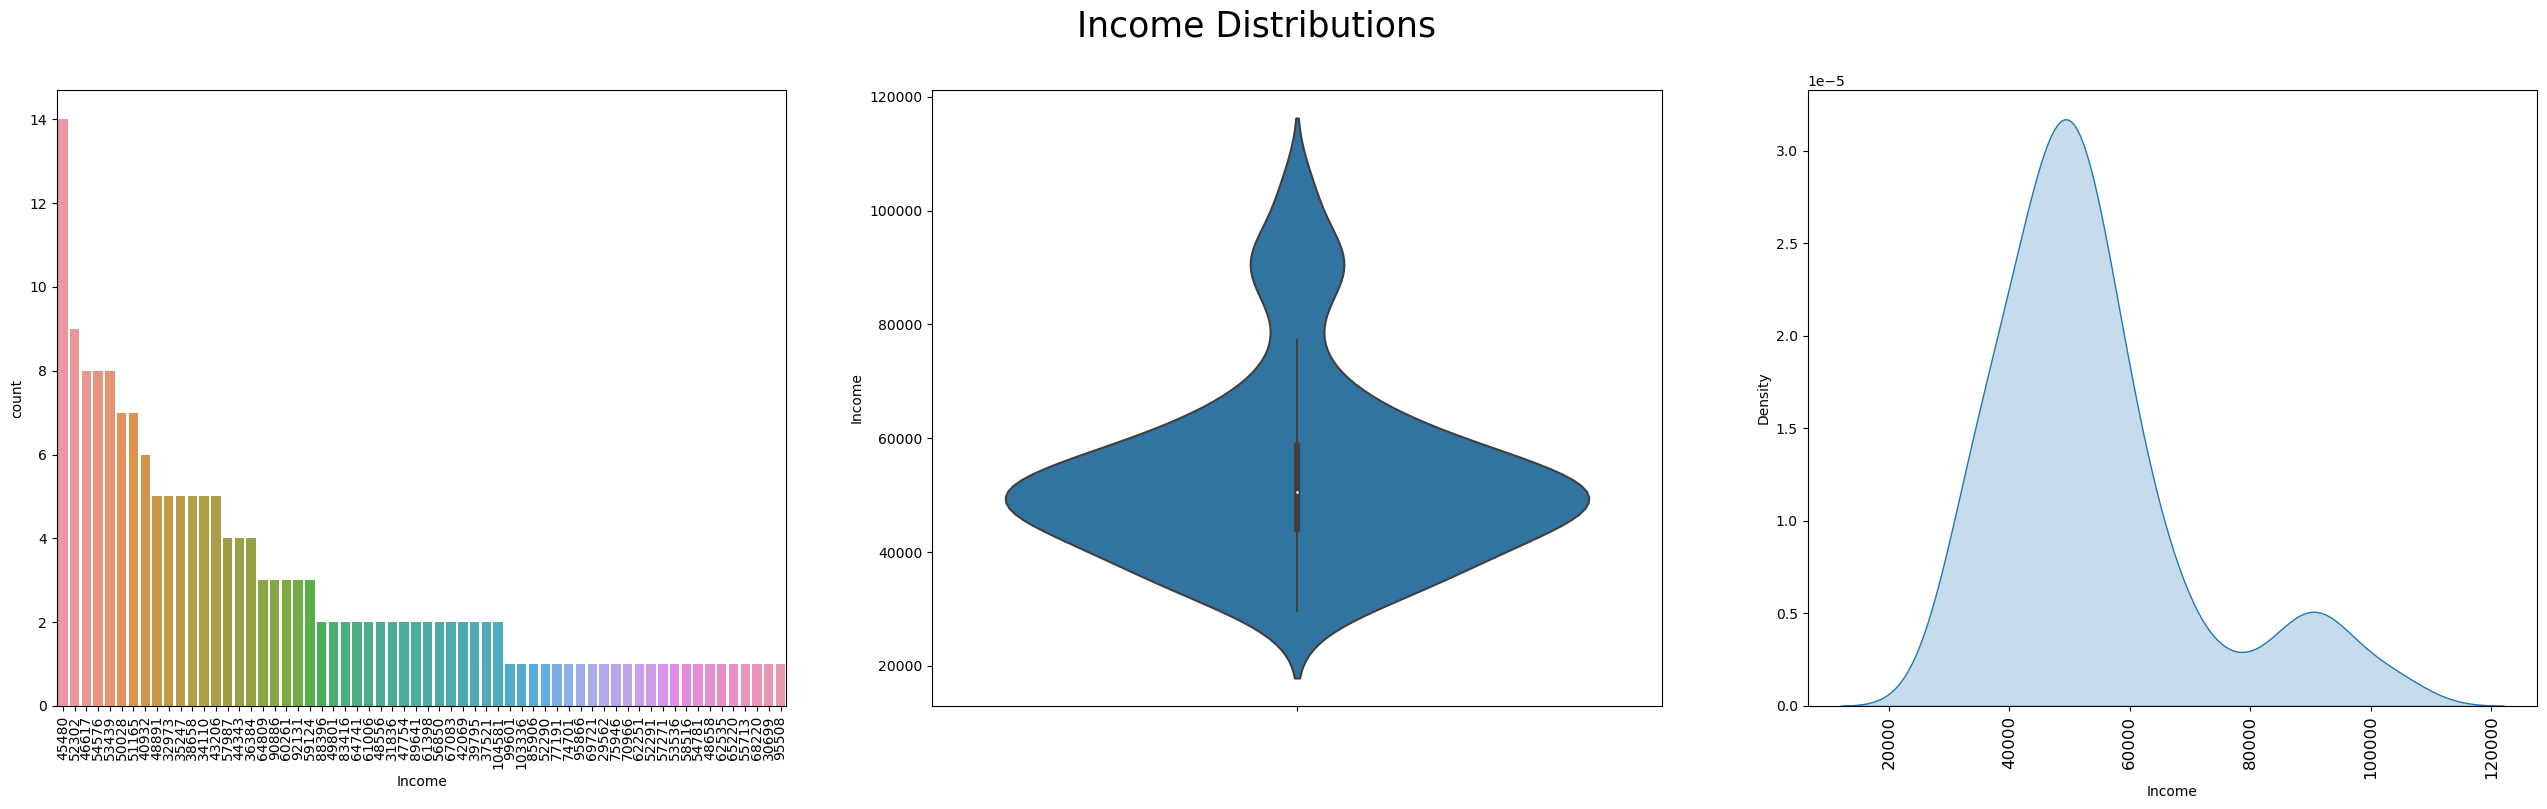

In [17]:
for col in ['Age', 'Miles', 'Education', 'Usage', 'Income']:
    plt.figure(figsize=(32, 8))
    plt.subplot(1, 3, 1)
    sns.countplot(data=df,
                 x=col,
                 order = df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.subplot(1, 3, 2)
    sns.violinplot(data=df,
                 y=col,
               fill=True)
    plt.xticks(rotation=90)
    plt.subplot(1, 3, 3)
    sns.kdeplot(data=df,
                 x=col,
               fill=True)
    plt.xticks(size=12, rotation=90)
    plt.suptitle(col + ' Distributions', size=25)
    plt.show()

### `Categorical Variables`

In [18]:
categories = ['Product', 'Gender', 'MaritalStatus', 'Fitness']

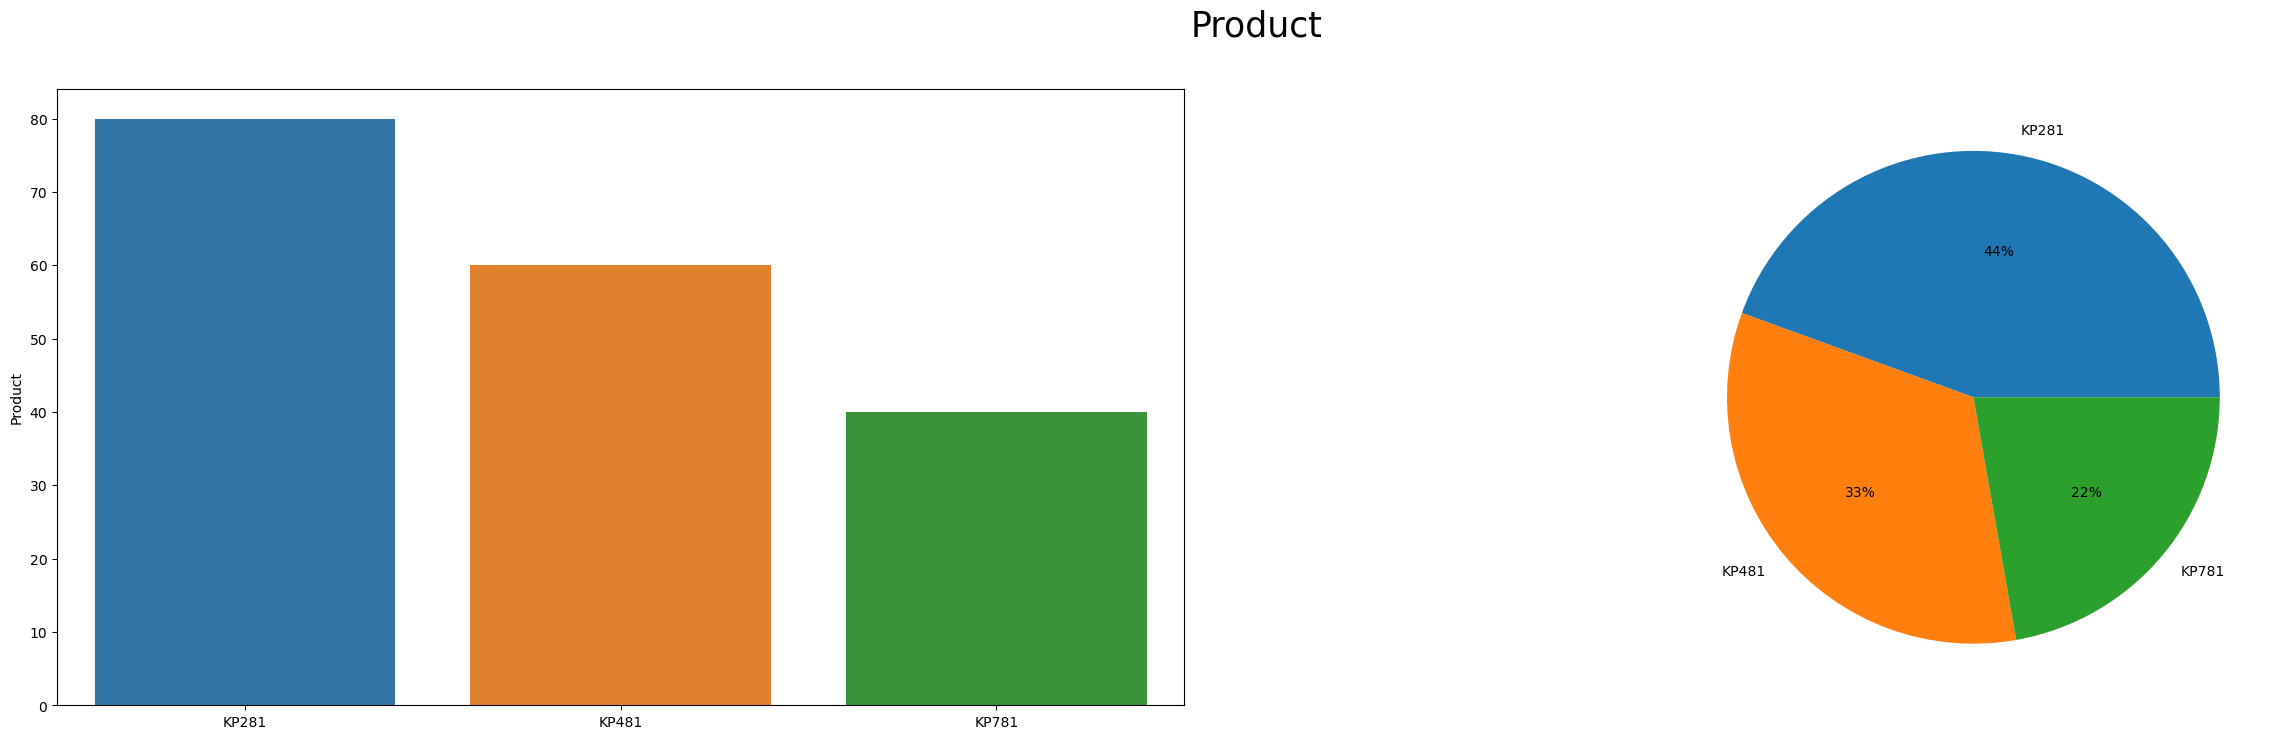

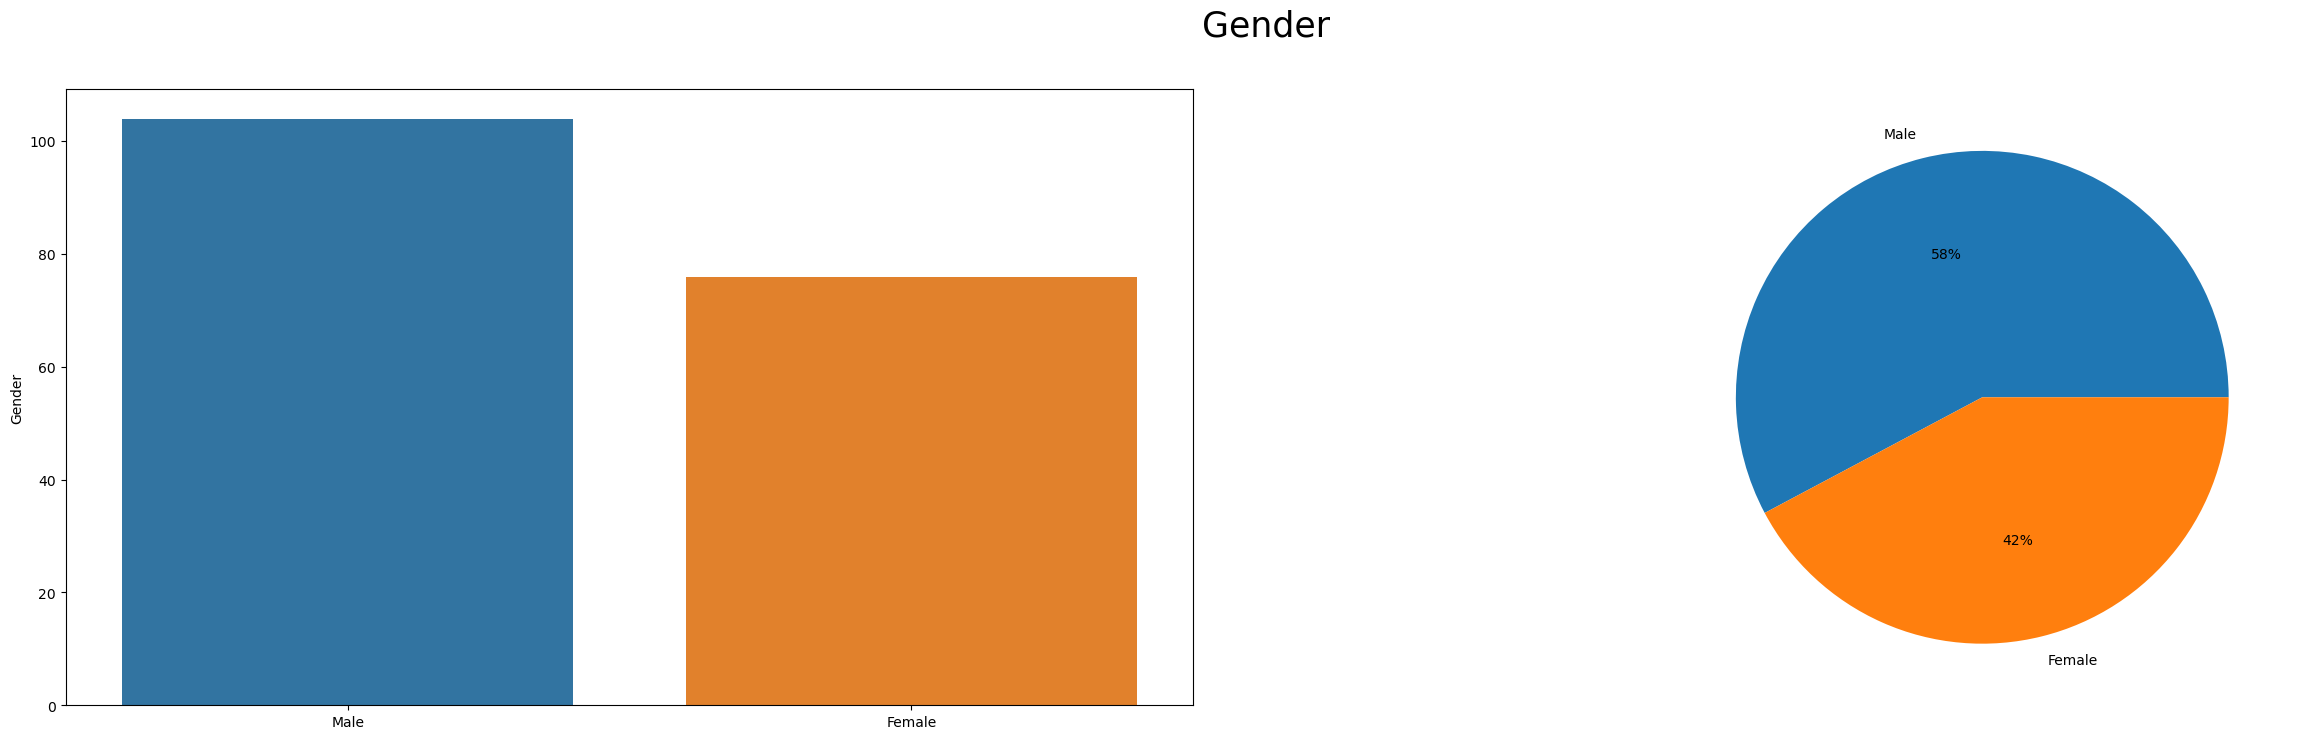

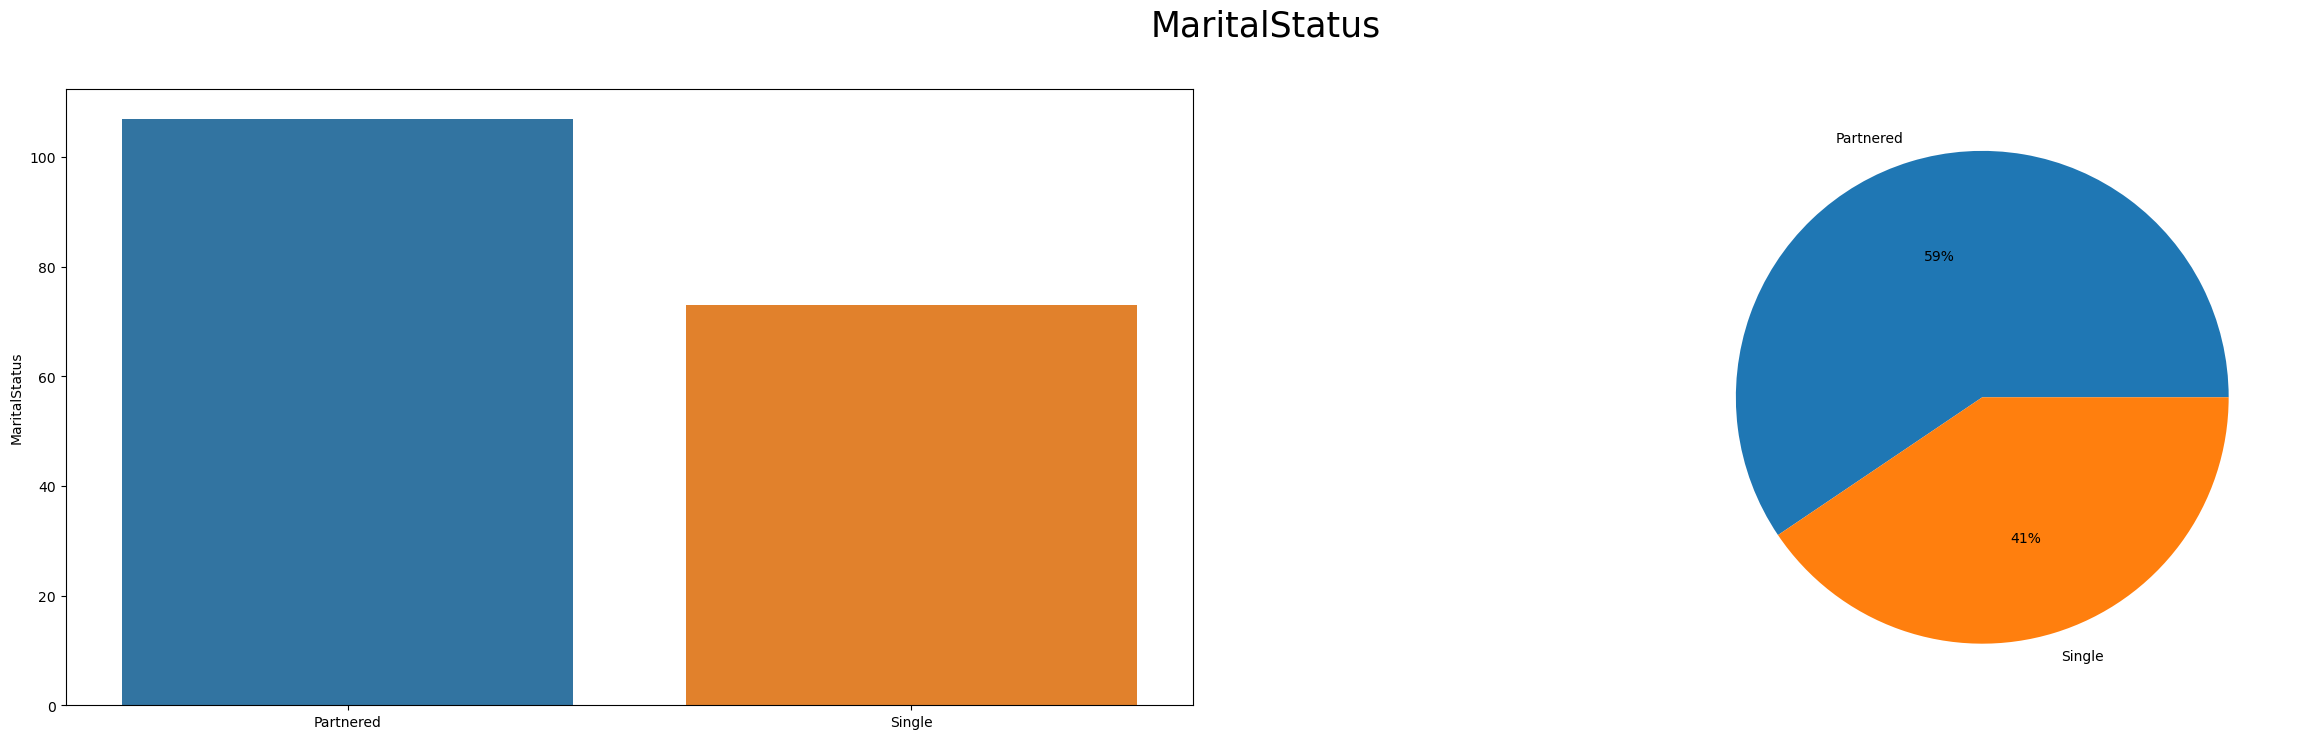

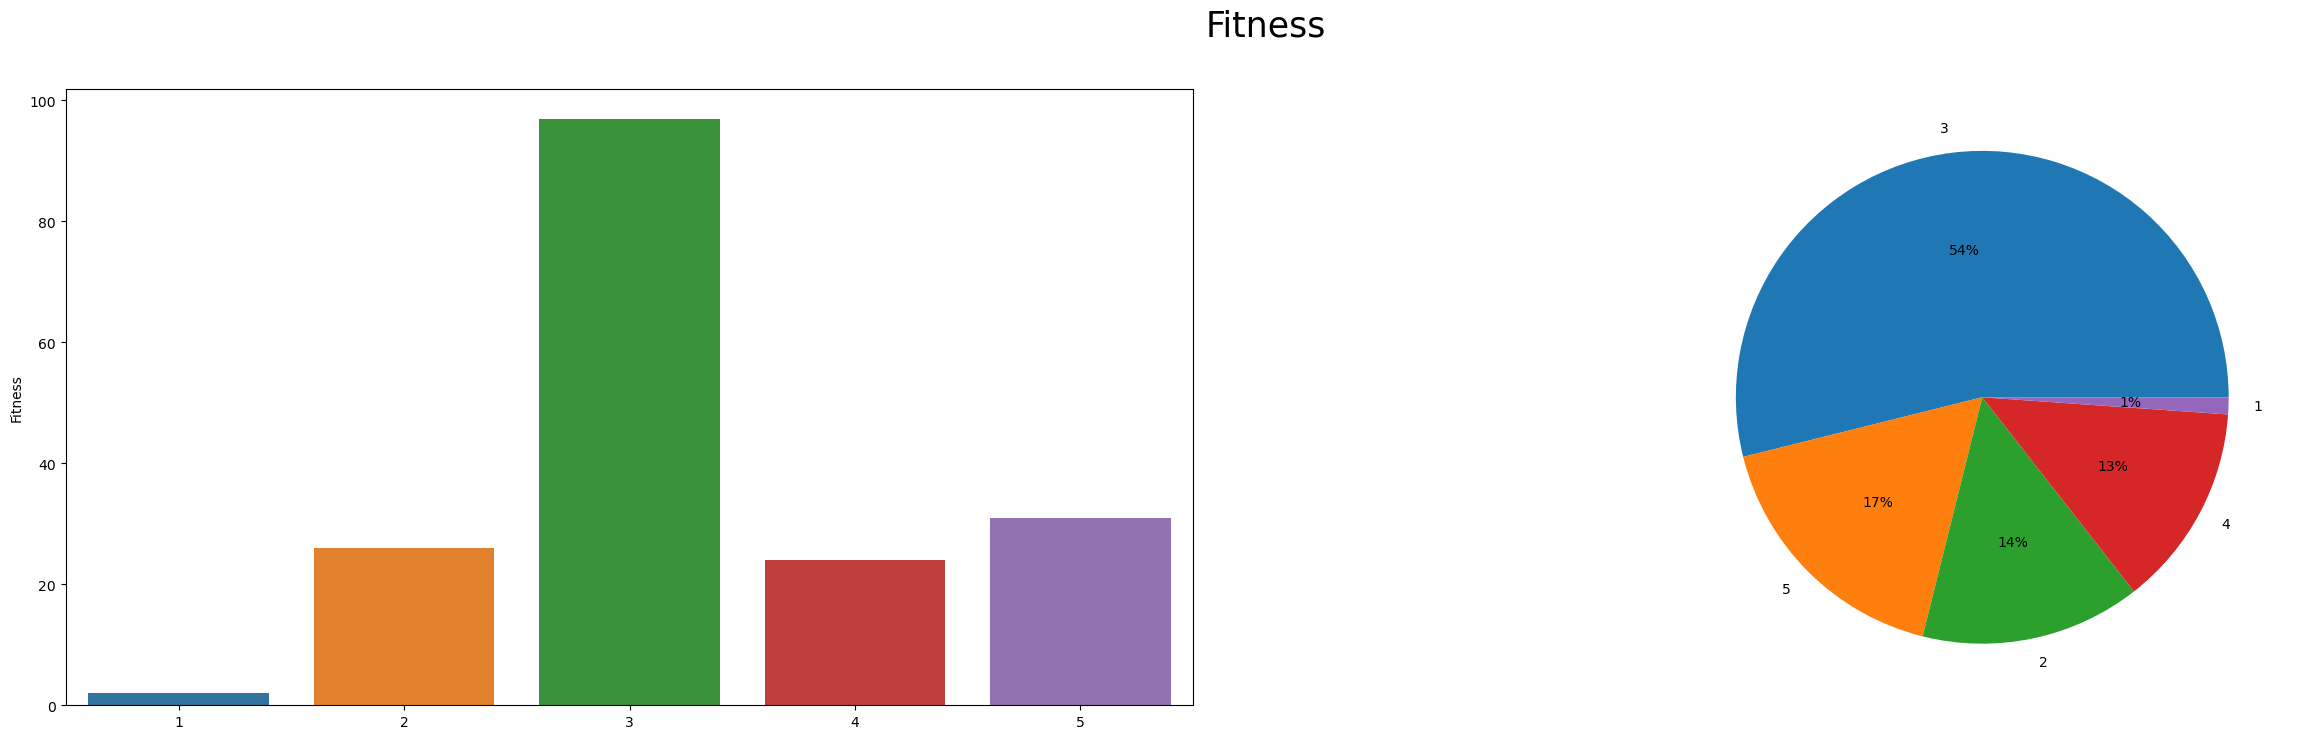

In [19]:
for col in categories:
    sns.color_palette('bright')
    plt.figure(figsize=(32, 8))
    plt.subplot(1, 2, 1)
    sns.barplot(y=df[col].value_counts(), x=df[col].value_counts().index)
    plt.subplot(1, 2, 2)
    plt.pie(x=df[col].value_counts(), labels=df[col].value_counts().index, autopct='%.0f%%')
    plt.suptitle(col, size=25)
    plt.show()

## 3.2 Multivariate Analysis

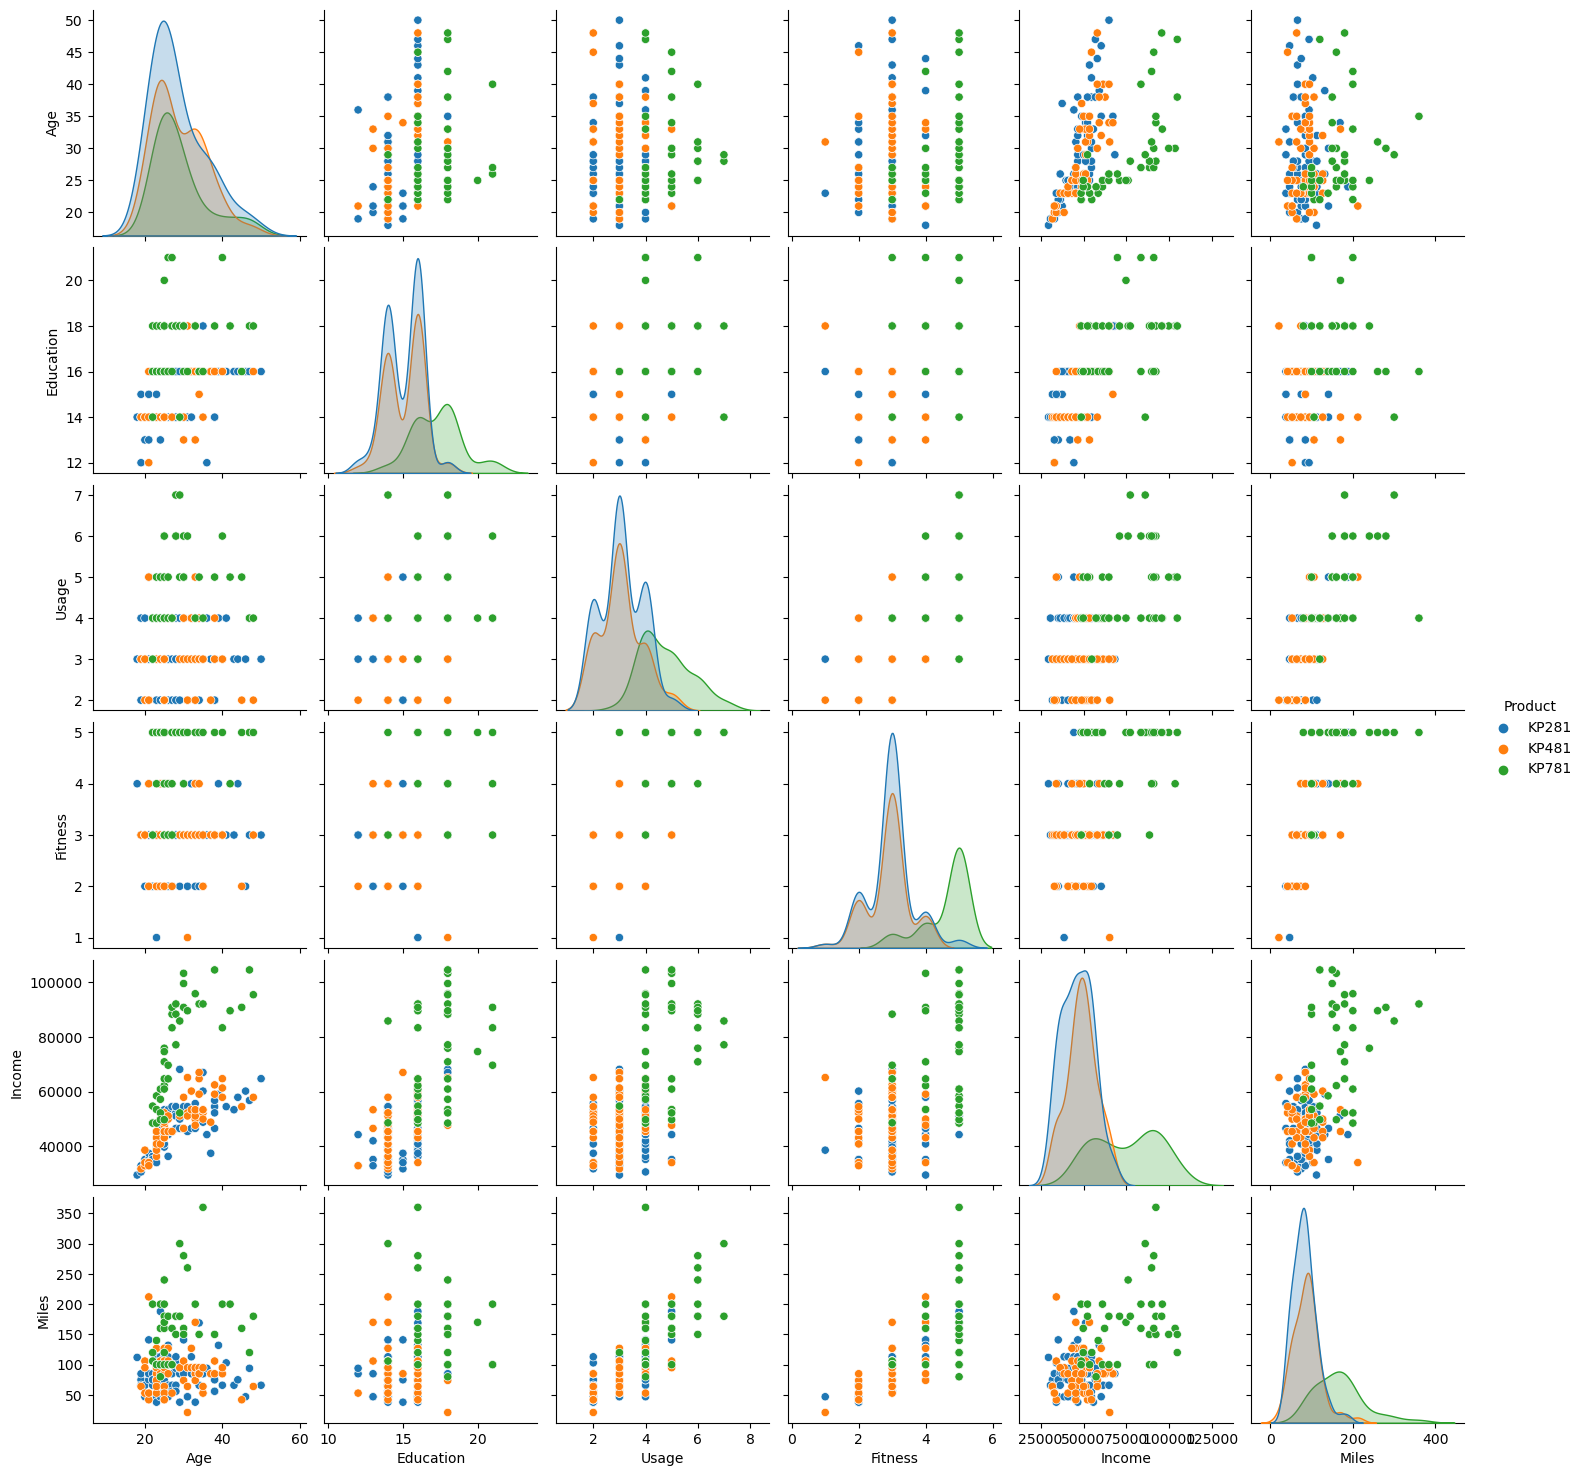

In [20]:
sns.pairplot(data=df, hue='Product')
plt.show()

`Categories vs Products`

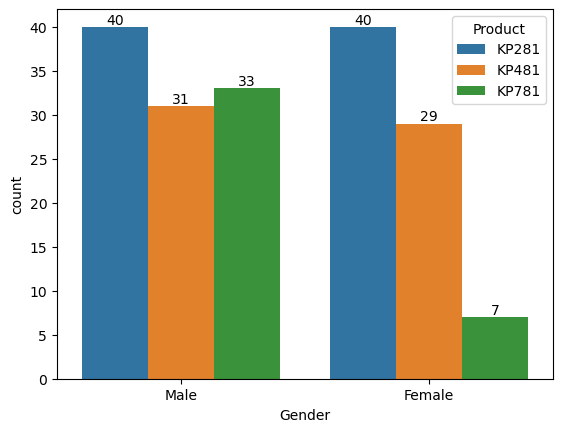

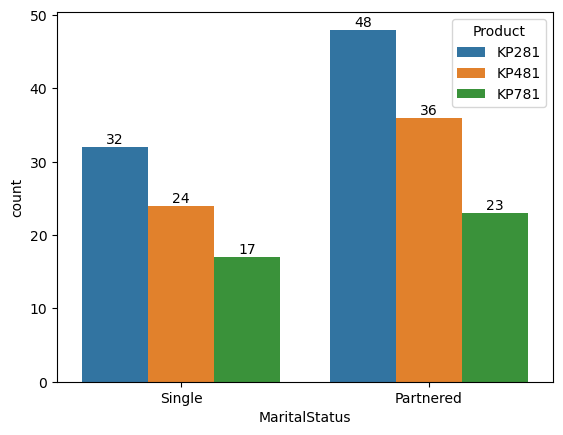

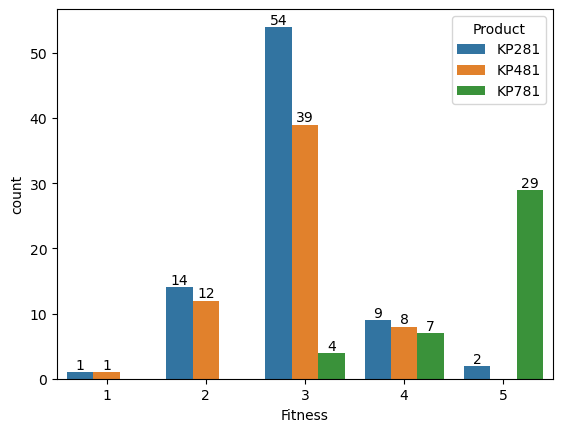

In [21]:
for c in categories:
    if c != 'Product':
        ax = sns.countplot(data= df,
             x=c,
             hue='Product')
        ax.bar_label(ax.containers[0])
        ax.bar_label(ax.containers[1])
        ax.bar_label(ax.containers[2])
        plt.show()

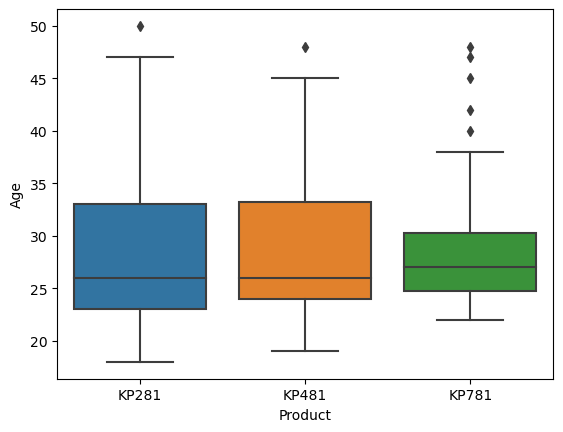

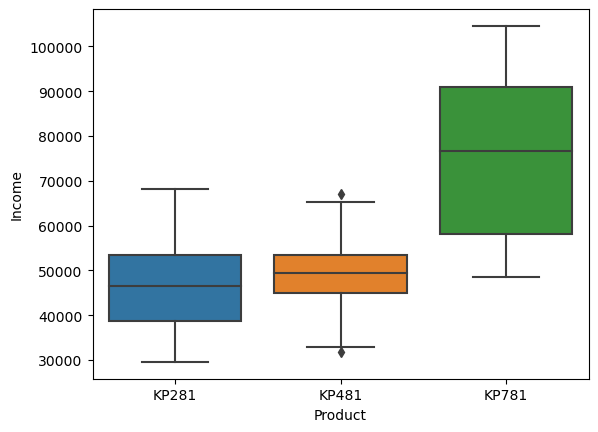

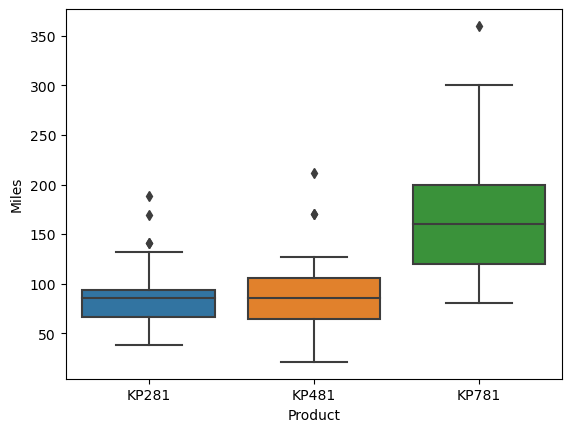

In [22]:
for col in ['Age', 'Income', 'Miles']:
    sns.boxplot(x='Product', y=col, data=df)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


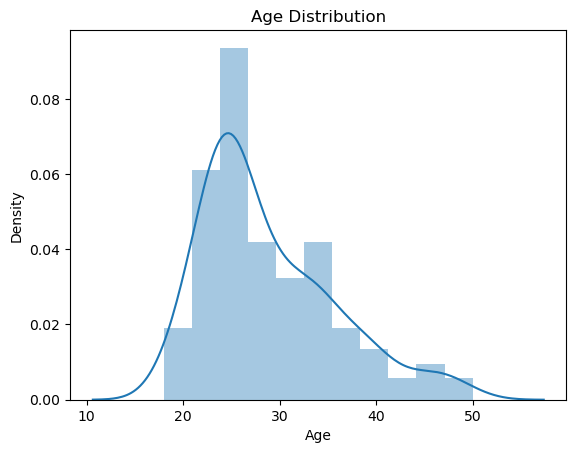

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

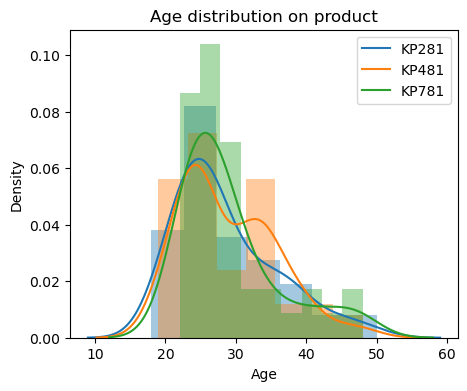

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


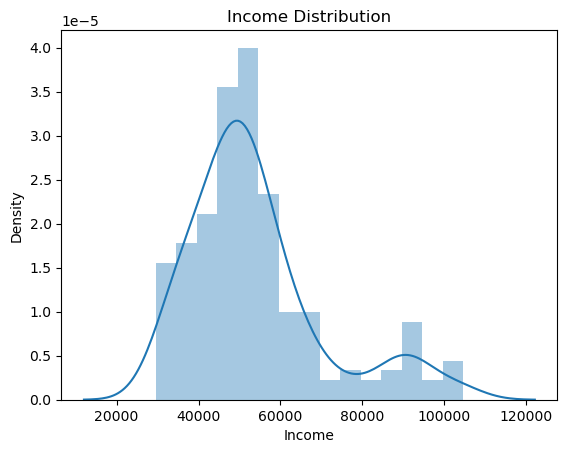

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

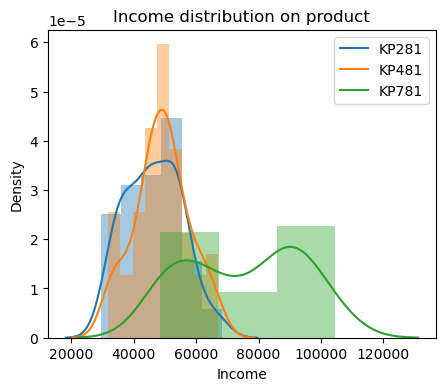

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


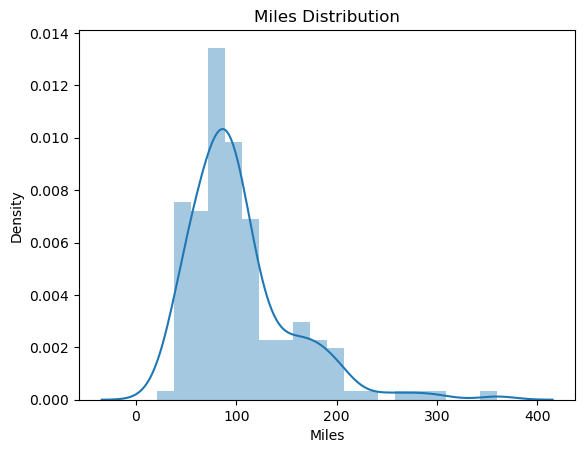

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

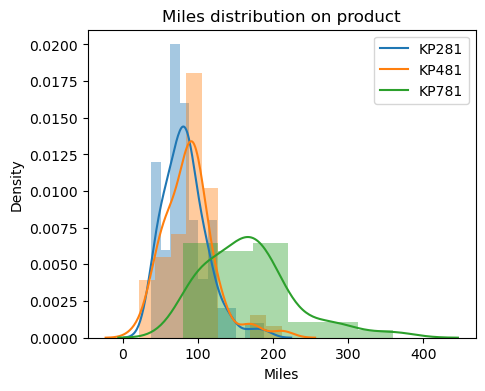

In [23]:
for col in ['Age', 'Income', 'Miles']:  
    sns.distplot(df[col])
#     plt.legend()
    plt.title(f'{col} Distribution')
    plt.show()
#     for t in ['KP281', 'KP481', 'KP781']:
    plt.figure(figsize=(5,4))
    kp281 = df[df['Product']=='KP281']
    kp481 = df[df['Product']=='KP481']
    kp781 = df[df['Product']=='KP781']
    sns.distplot(kp281[col])
    sns.distplot(kp481[col])
    sns.distplot(kp781[col])
    plt.legend(['KP281', 'KP481', 'KP781'])
    plt.title(f'{col} distribution on product')
    plt.show()

<AxesSubplot:>

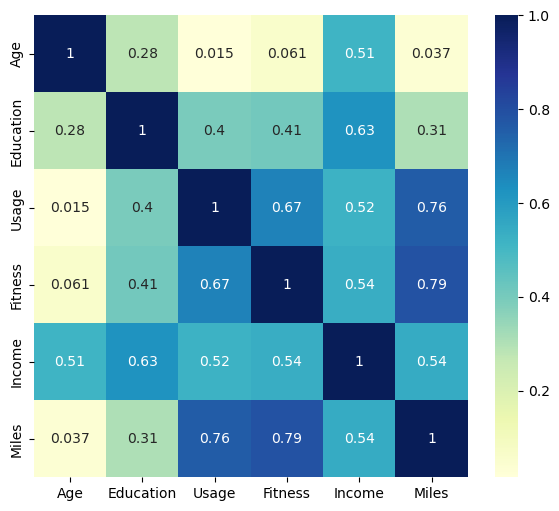

In [24]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


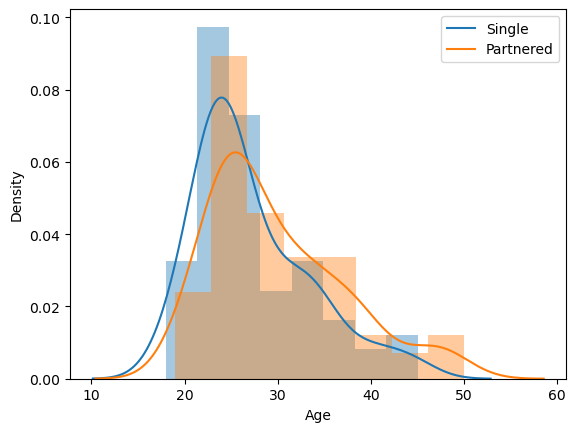

In [25]:
single = df[df['MaritalStatus']=='Single']
married = df[df['MaritalStatus']=='Partnered']
sns.distplot(x=single['Age'])
sns.distplot(x=married['Age'])
plt.legend(['Single', 'Partnered'])
plt.xlabel('Age')
plt.show()

# 4. Missing value & Outlier Detection

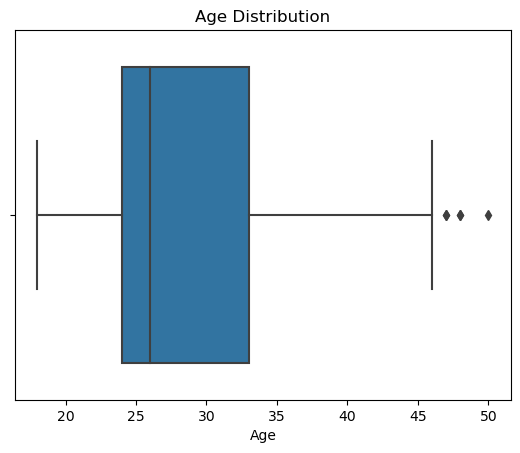

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


----------------------------------------------------------------------------------------------------


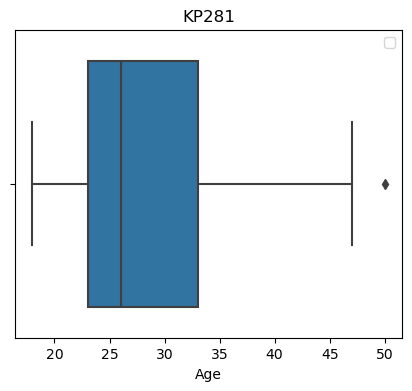

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


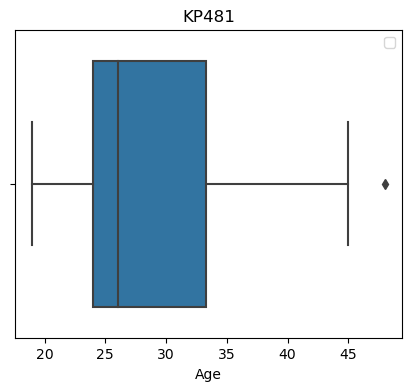

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


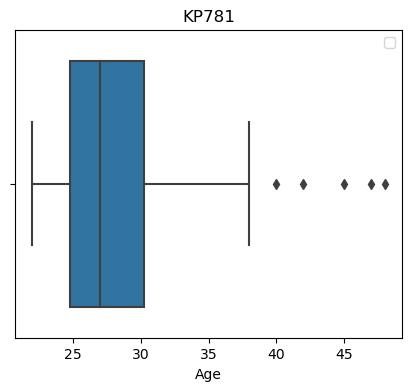

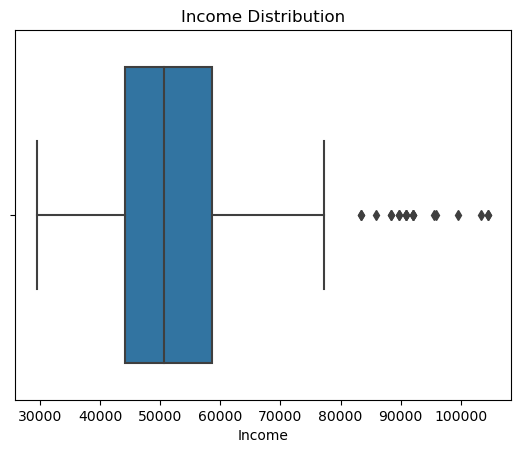

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


----------------------------------------------------------------------------------------------------


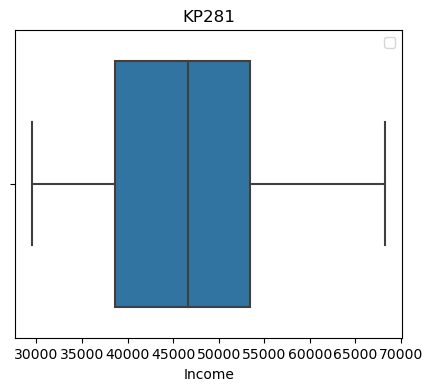

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


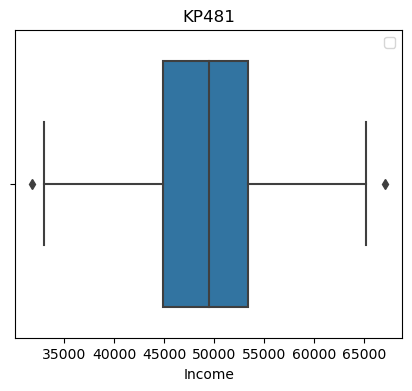

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


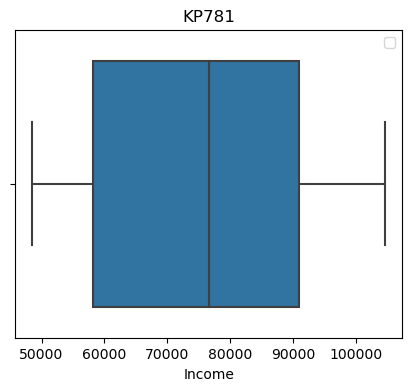

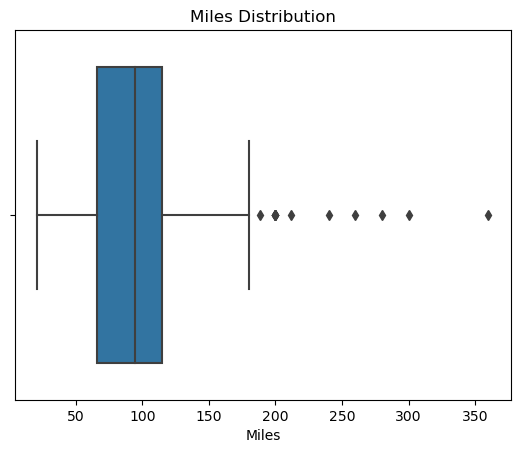

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


----------------------------------------------------------------------------------------------------


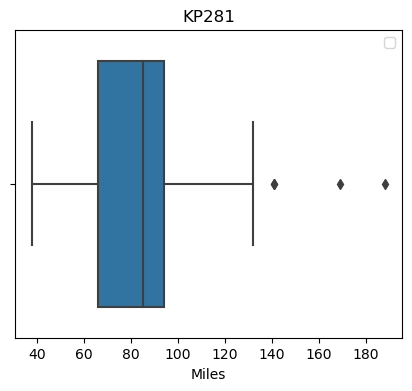

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


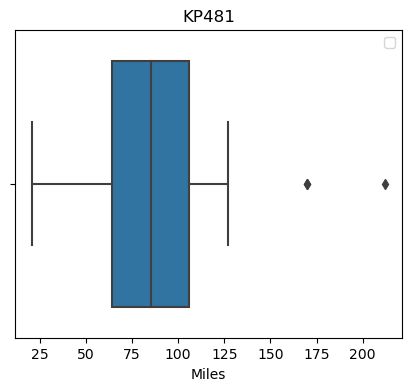

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


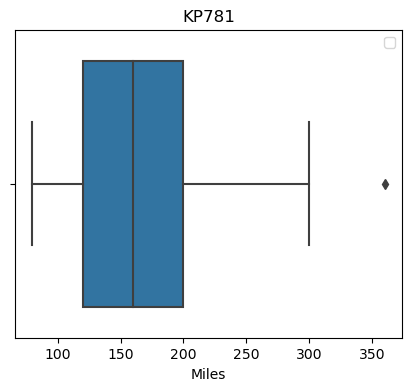

In [26]:
# Checking Outliers
title = np.array(['Age Distribution', 'Income Distribution', 'Miles Distribution'])
for i, col in enumerate(['Age', 'Income', 'Miles']):
    sns.boxplot(x=col, data=df)
    plt.title(title[i])
    plt.show()
    print('-'*100)
    for t in ['KP281', 'KP481', 'KP781']:
        plt.figure(figsize=(5,4))
        kp = df[df['Product']==t]
        sns.boxplot(kp[col])
        plt.legend()
        plt.title(t)
        plt.show()

# 5. Business Insights based on Non-Graphical and Visual Analysis

`Marginal Probability`

In [27]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

`Conditional Probabilities`

Probability of each product given gender

In [28]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid gender value."
    
    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()
    
    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")
    
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Ayush\AppData\Local\Temp\ipykernel_22880\2148431849.py:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":
C:\Users\Ayush\AppData\Local\Temp\ipykernel_22880\2148431849.py:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":


Probability of each product given MaritalStatus

In [29]:
def p_prod_given_mstatus(status, print_marginal=False):
    if status is not "Single" and status is not "Partnered":
        return "Invalid marital status value."
    
    df1 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p_781 = df1['KP781'][status] / df1.loc[status].sum()
    p_481 = df1['KP481'][status] / df1.loc[status].sum()
    p_281 = df1['KP281'][status] / df1.loc[status].sum()
    
    if print_marginal:
        print(f"P(Single): {df1.loc['Single'].sum()/len(df):.2f}")
        print(f"P(Partnered): {df1.loc['Partnered'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{status}): {p_781:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP281/{status}): {p_281:.2f}\n")
    
p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Ayush\AppData\Local\Temp\ipykernel_22880\1050105618.py:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if status is not "Single" and status is not "Partnered":
C:\Users\Ayush\AppData\Local\Temp\ipykernel_22880\1050105618.py:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if status is not "Single" and status is not "Partnered":


P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



`Observations`
1. Product vs Age
    - Customers purchasing products KP281 & KP481 are having same Age median value.
    - Customers whose age lies between 25-30, are more likely to buy KP781 product
2. Product vs Education
    - Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
    - While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.
3. Product vs Usage
    - Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
    - While the other customers are likely to purchasing KP281 or KP481.
4. Product vs Fitness
    - The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.
5. Product vs Income
    - Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.
6. Product vs Miles
    - If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.
7. Product vs Gender
    - Equal number of males and females have purchased KP281 product and Almost same for the product KP481
    - Most of the Male customers have purchased the KP781 product.
8. Product vs MaritalStatus
    - Customer who is Partnered, is more likely to purchase the product.
9. Product
    - 44.44% of the customers have purchased KP2821 product.
    - 33.33% of the customers have purchased KP481 product.
    - 22.22% of the customers have purchased KP781 product.
10. Gender
    - 57.78% of the customers are Male.
11. MaritalStatus
    - 59.44% of the customers are Partnered.

# 6. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

1. Target more customers having age between 18 to 35 as more than 85% of the customers who bought treadmill lie in this range.
2. Males are more likely to purchase a treadmill with 58% ratio than Females. Both are likely to purchase equal number of KP281 and KP481, but Males have high chances of purchasing KP781 as 82% of total sale of KP781 is purchased by Males.
3. People with Education levels less than or equal to 16 are likely to purchase KP281 and KP481. And people with Education levels greater than or equal to 16 are likely to purchase KP781.
4. People with Usage less than or equal to 4 are likely to purchase KP281 and KP481. And people with Usage greater than or equal to 4 are likely to purchase KP781.
5. People with Income less than 6000 are likely to purchase KP281 and KP481. And people with Income greater than 6000 are likely to purchase KP781.
6. People with Fitness Level 3 or less are likely to purchase KP281 and KP481. And with Fitness Level 5 are likely to purchase KP781.
7. People who use the treadmill more are more likely to purchase KP781. As, buying the treadmill is directly proportional to it's usage.